# Business Problem

<img src="Screenshot 2025-07-23 162245.png">

# Objective and Goal

<img src="Screenshot 2025-07-23 162257.png" >

# Constraints for solving the problem

<img src="Screenshot 2025-07-23 162312.png">

## Step-by-Step Credit Risk Modeling Process

### 1. Understand the Business Problem

### 2. Load the Dataset(Data Gathering)

### 3. Explore the Data(EDA)

### 4. Preprocess the Data

### 5. Split the Data

### 6. Train Machine Learning Models

### 7. Evaluate the Model

### 8. Improve & Fine-Tune

### 9. Interpret the Results


In [1]:
# important import for given project  
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Gathering

In [30]:
# all colums which are in dataset  --> infromation in german.doc
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "EmploymentSince", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "NumberCredits", "Job", "LiablePeople", "Telephone", "ForeignWorker",
    "Class"
]

df_categorical = pd.read_csv("Data/german.data", sep=' ', header=None, names=columns)

In [31]:
df_categorical.iloc[:, :10].head(4)

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103


In [32]:
df_categorical.iloc[:,10:21].head(4)

,ResidenceSince,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,LiablePeople,Telephone,ForeignWorker,Class
0,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,4,A122,45,A143,A153,1,A173,2,A191,A201,1


In [33]:
df_categorical['Class'].value_counts()

Class
1    700
2    300
Name: count, dtype: int64

In [34]:
df_categorical.columns = df_categorical.columns.str.strip()

In [35]:

categorical_cols = df_categorical.select_dtypes(include='object').columns.tolist()
df=df_categorical.copy()

In [37]:
# # Encode categorical
# df=df_categorical.copy()
# le_dict = {}
# for col in df_categorical.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     le_dict[col] = le

In [38]:
df['Class']=df_categorical['Class']

In [39]:
df.iloc[:,:10].head(4)

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103


In [40]:
df.iloc[:,10:21].head(4)

,ResidenceSince,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,LiablePeople,Telephone,ForeignWorker,Class
0,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,4,A122,45,A143,A153,1,A173,2,A191,A201,1


In [41]:
print(df.columns.tolist())

['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex', 'OtherDebtors', 'ResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans', 'Housing', 'NumberCredits', 'Job', 'LiablePeople', 'Telephone', 'ForeignWorker', 'Class']


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   EmploymentSince        1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   PersonalStatusSex      1000 non-null   object
 9   OtherDebtors           1000 non-null   object
 10  ResidenceSince         1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  NumberCredits         

In [43]:
df.isnull().sum()

Status                   0
Duration                 0
CreditHistory            0
Purpose                  0
CreditAmount             0
Savings                  0
EmploymentSince          0
InstallmentRate          0
PersonalStatusSex        0
OtherDebtors             0
ResidenceSince           0
Property                 0
Age                      0
OtherInstallmentPlans    0
Housing                  0
NumberCredits            0
Job                      0
LiablePeople             0
Telephone                0
ForeignWorker            0
Class                    0
dtype: int64

In [44]:
df['Class'].value_counts()

Class
1    700
2    300
Name: count, dtype: int64

In [45]:
set(df['Class'])

{1, 2}

In [46]:
df.duplicated().sum()

0

In [47]:
df.to_csv("german.csv", index=False)

# Exploratory Data Analysis

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import pandas as pd 
df=pd.read_csv("german.csv")

In [50]:
categorical_cols = [
    "Status", "CreditHistory", "Purpose", "Savings", "EmploymentSince", 
    "PersonalStatusSex", "OtherDebtors", "Property", "OtherInstallmentPlans", 
    "Housing", "Job", "Telephone", "ForeignWorker"
]


In [51]:
numeric_cols = [
    "Duration", "CreditAmount", "InstallmentRate", "ResidenceSince", 
    "Age", "NumberCredits", "LiablePeople"
]

In [52]:
# Univarent anylsis 

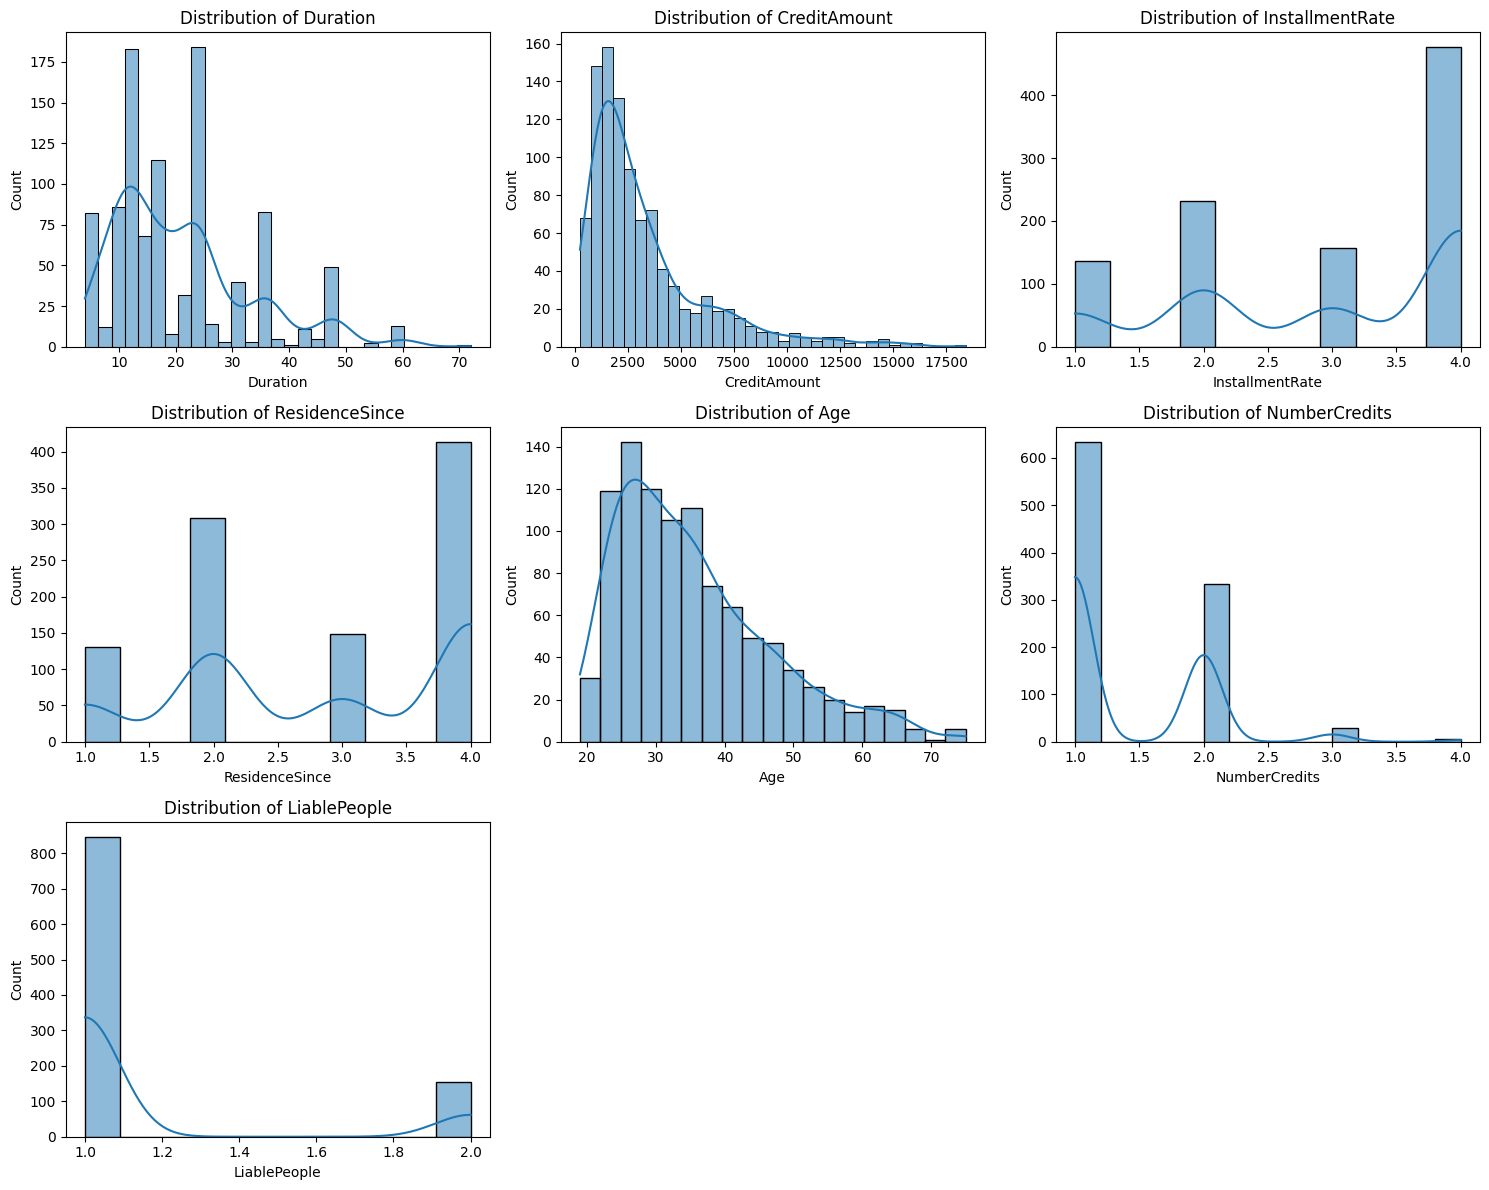

In [53]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i]).set(title=f'Distribution of {col}')

for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


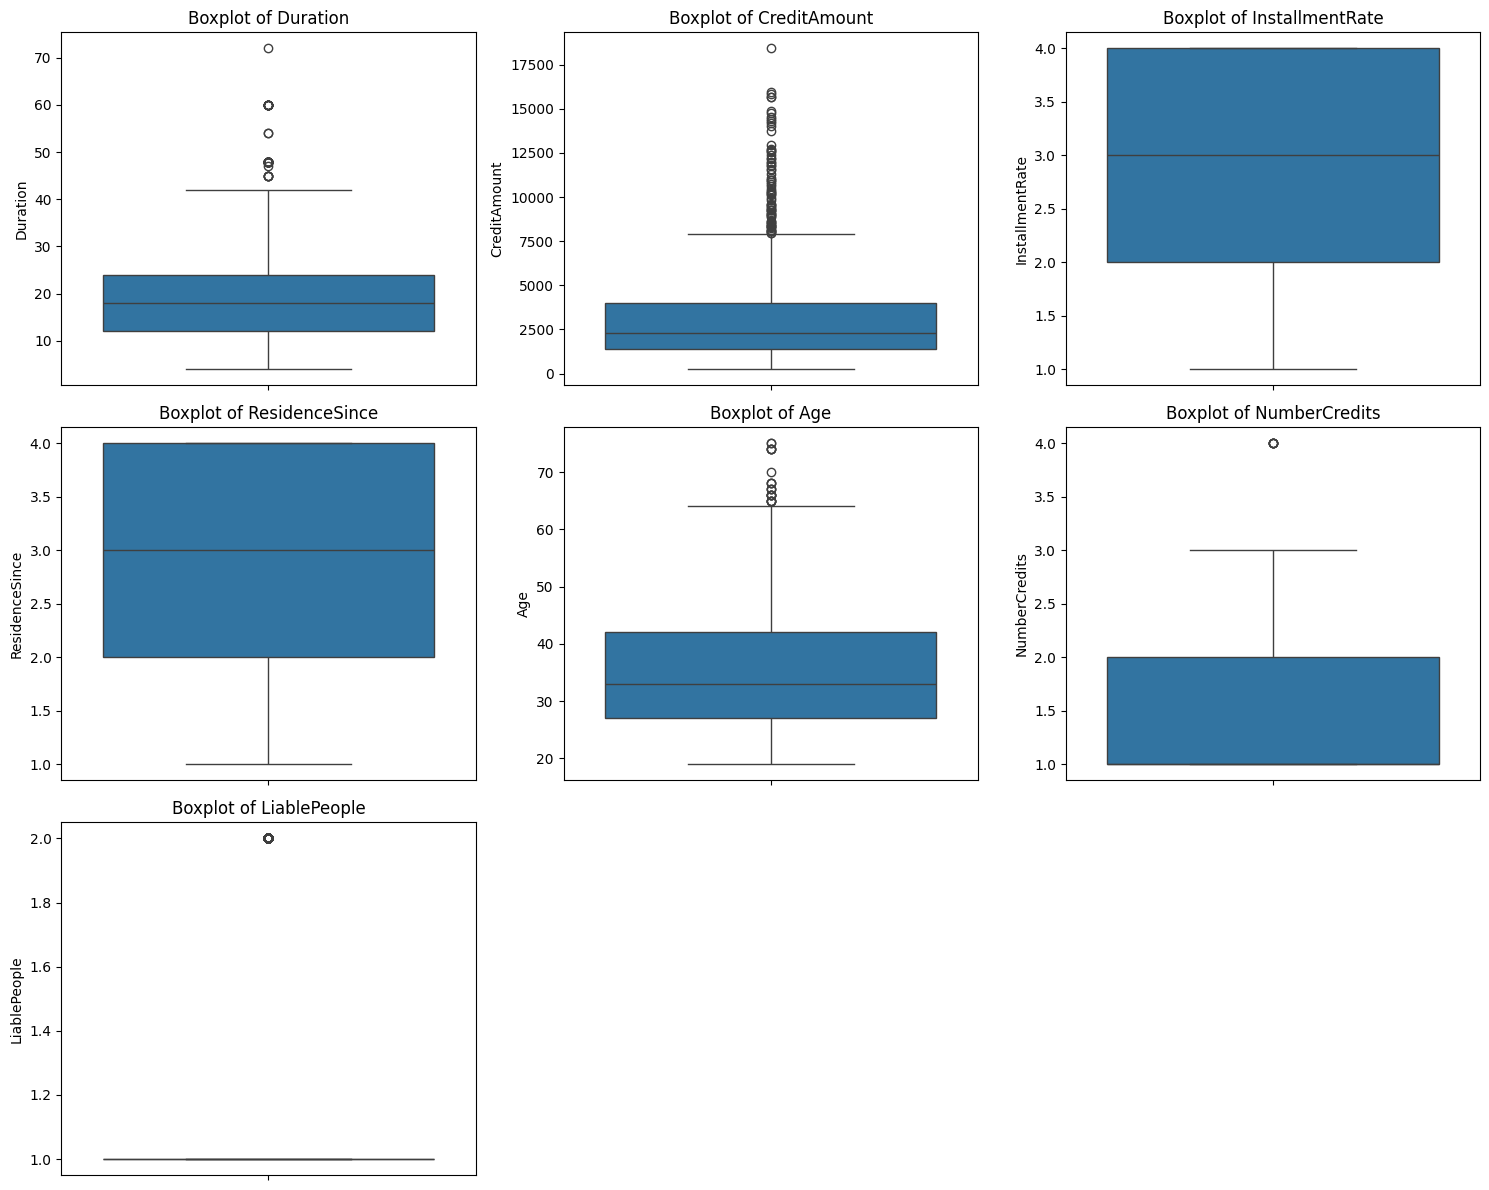

In [54]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


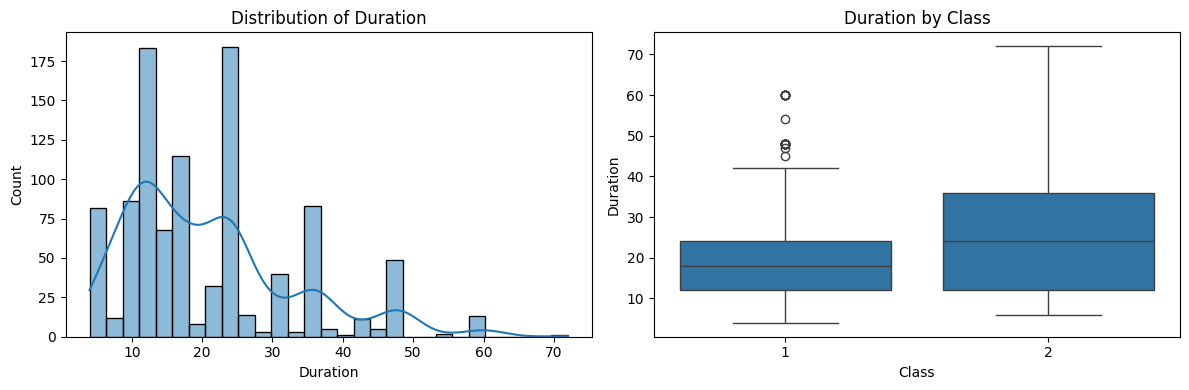

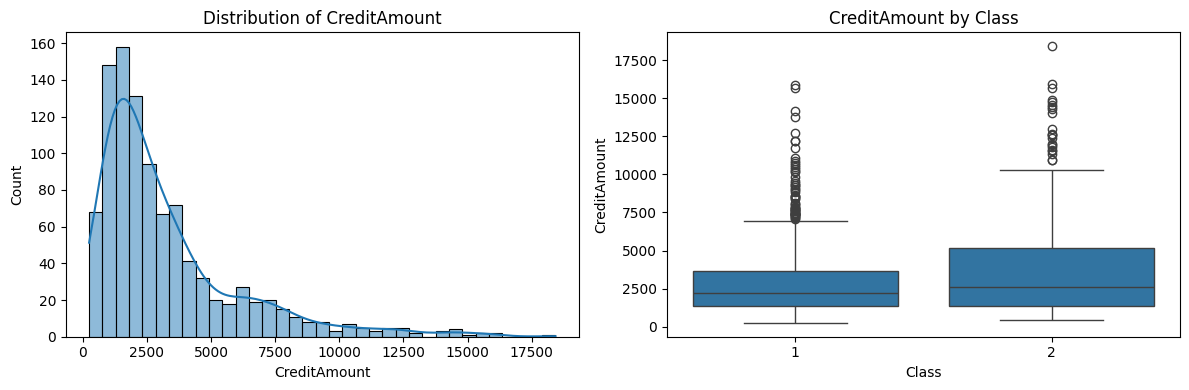

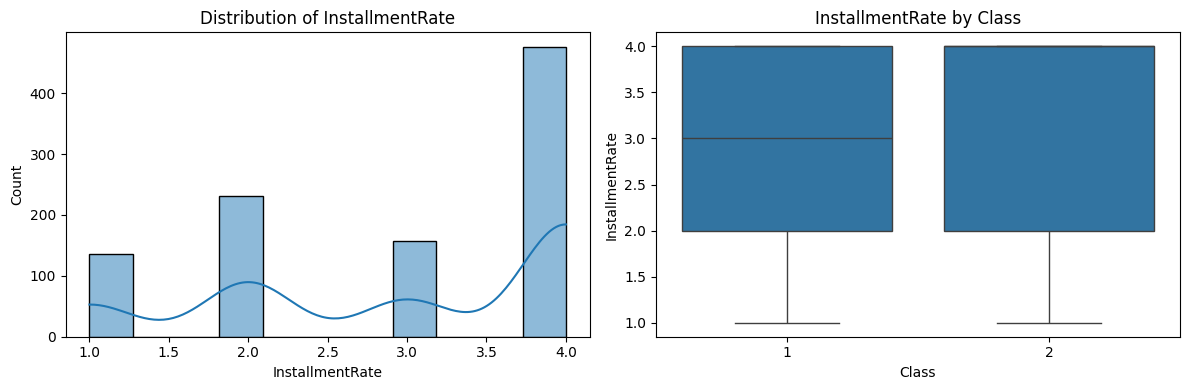

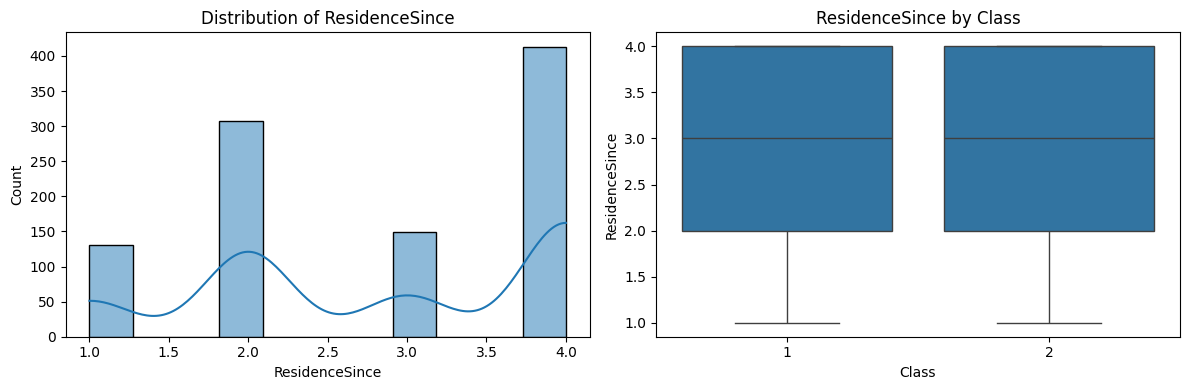

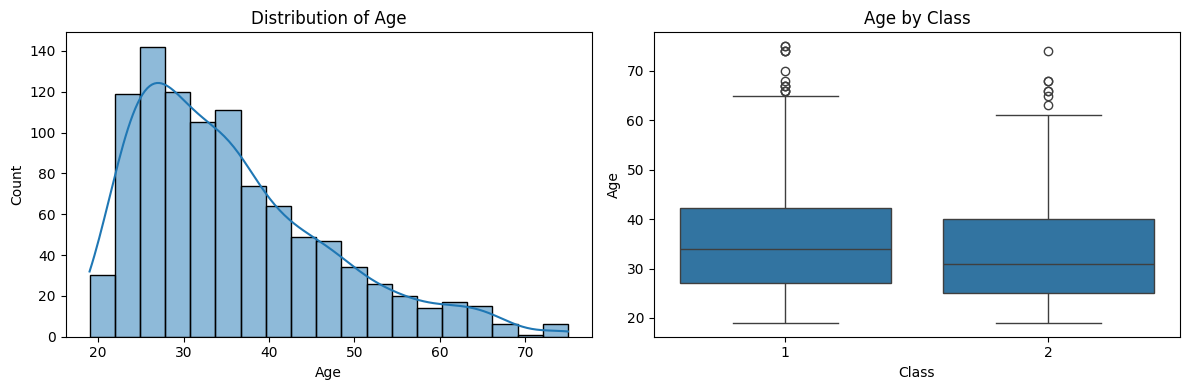

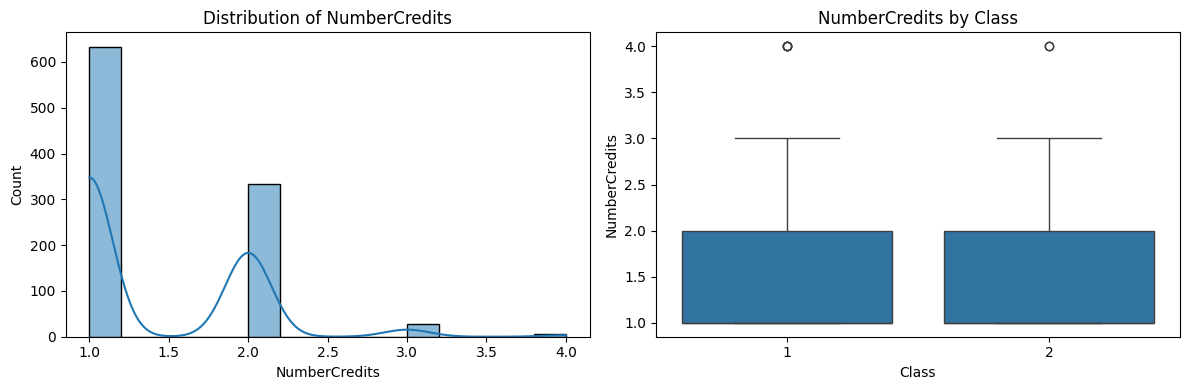

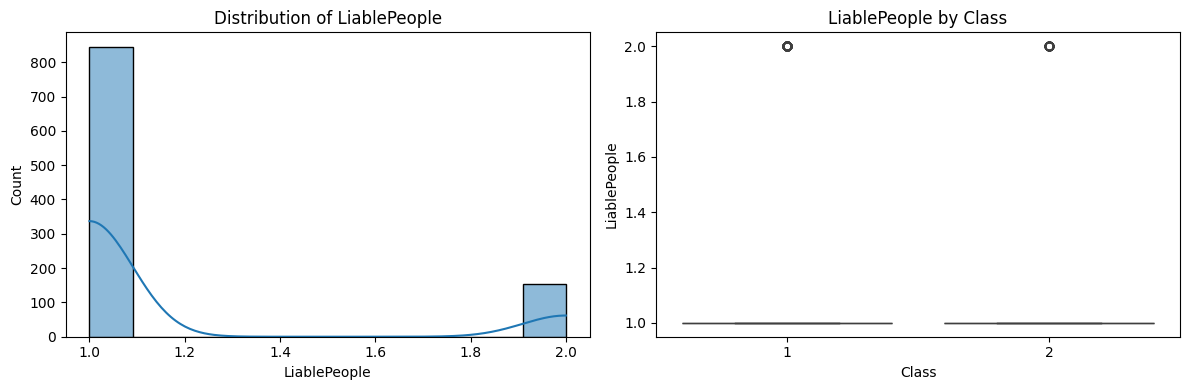

In [55]:
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    
    # Boxplot by class
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x="Class", y=col)
    plt.title(f"{col} by Class")
    
    plt.tight_layout()
    plt.show()



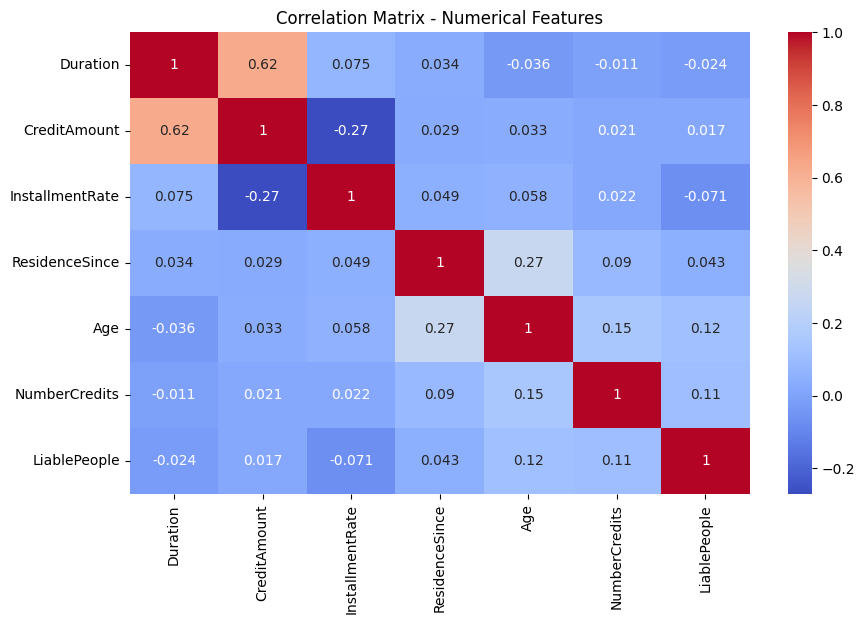

In [56]:
# Only for numerical features
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Numerical Features")
plt.show()


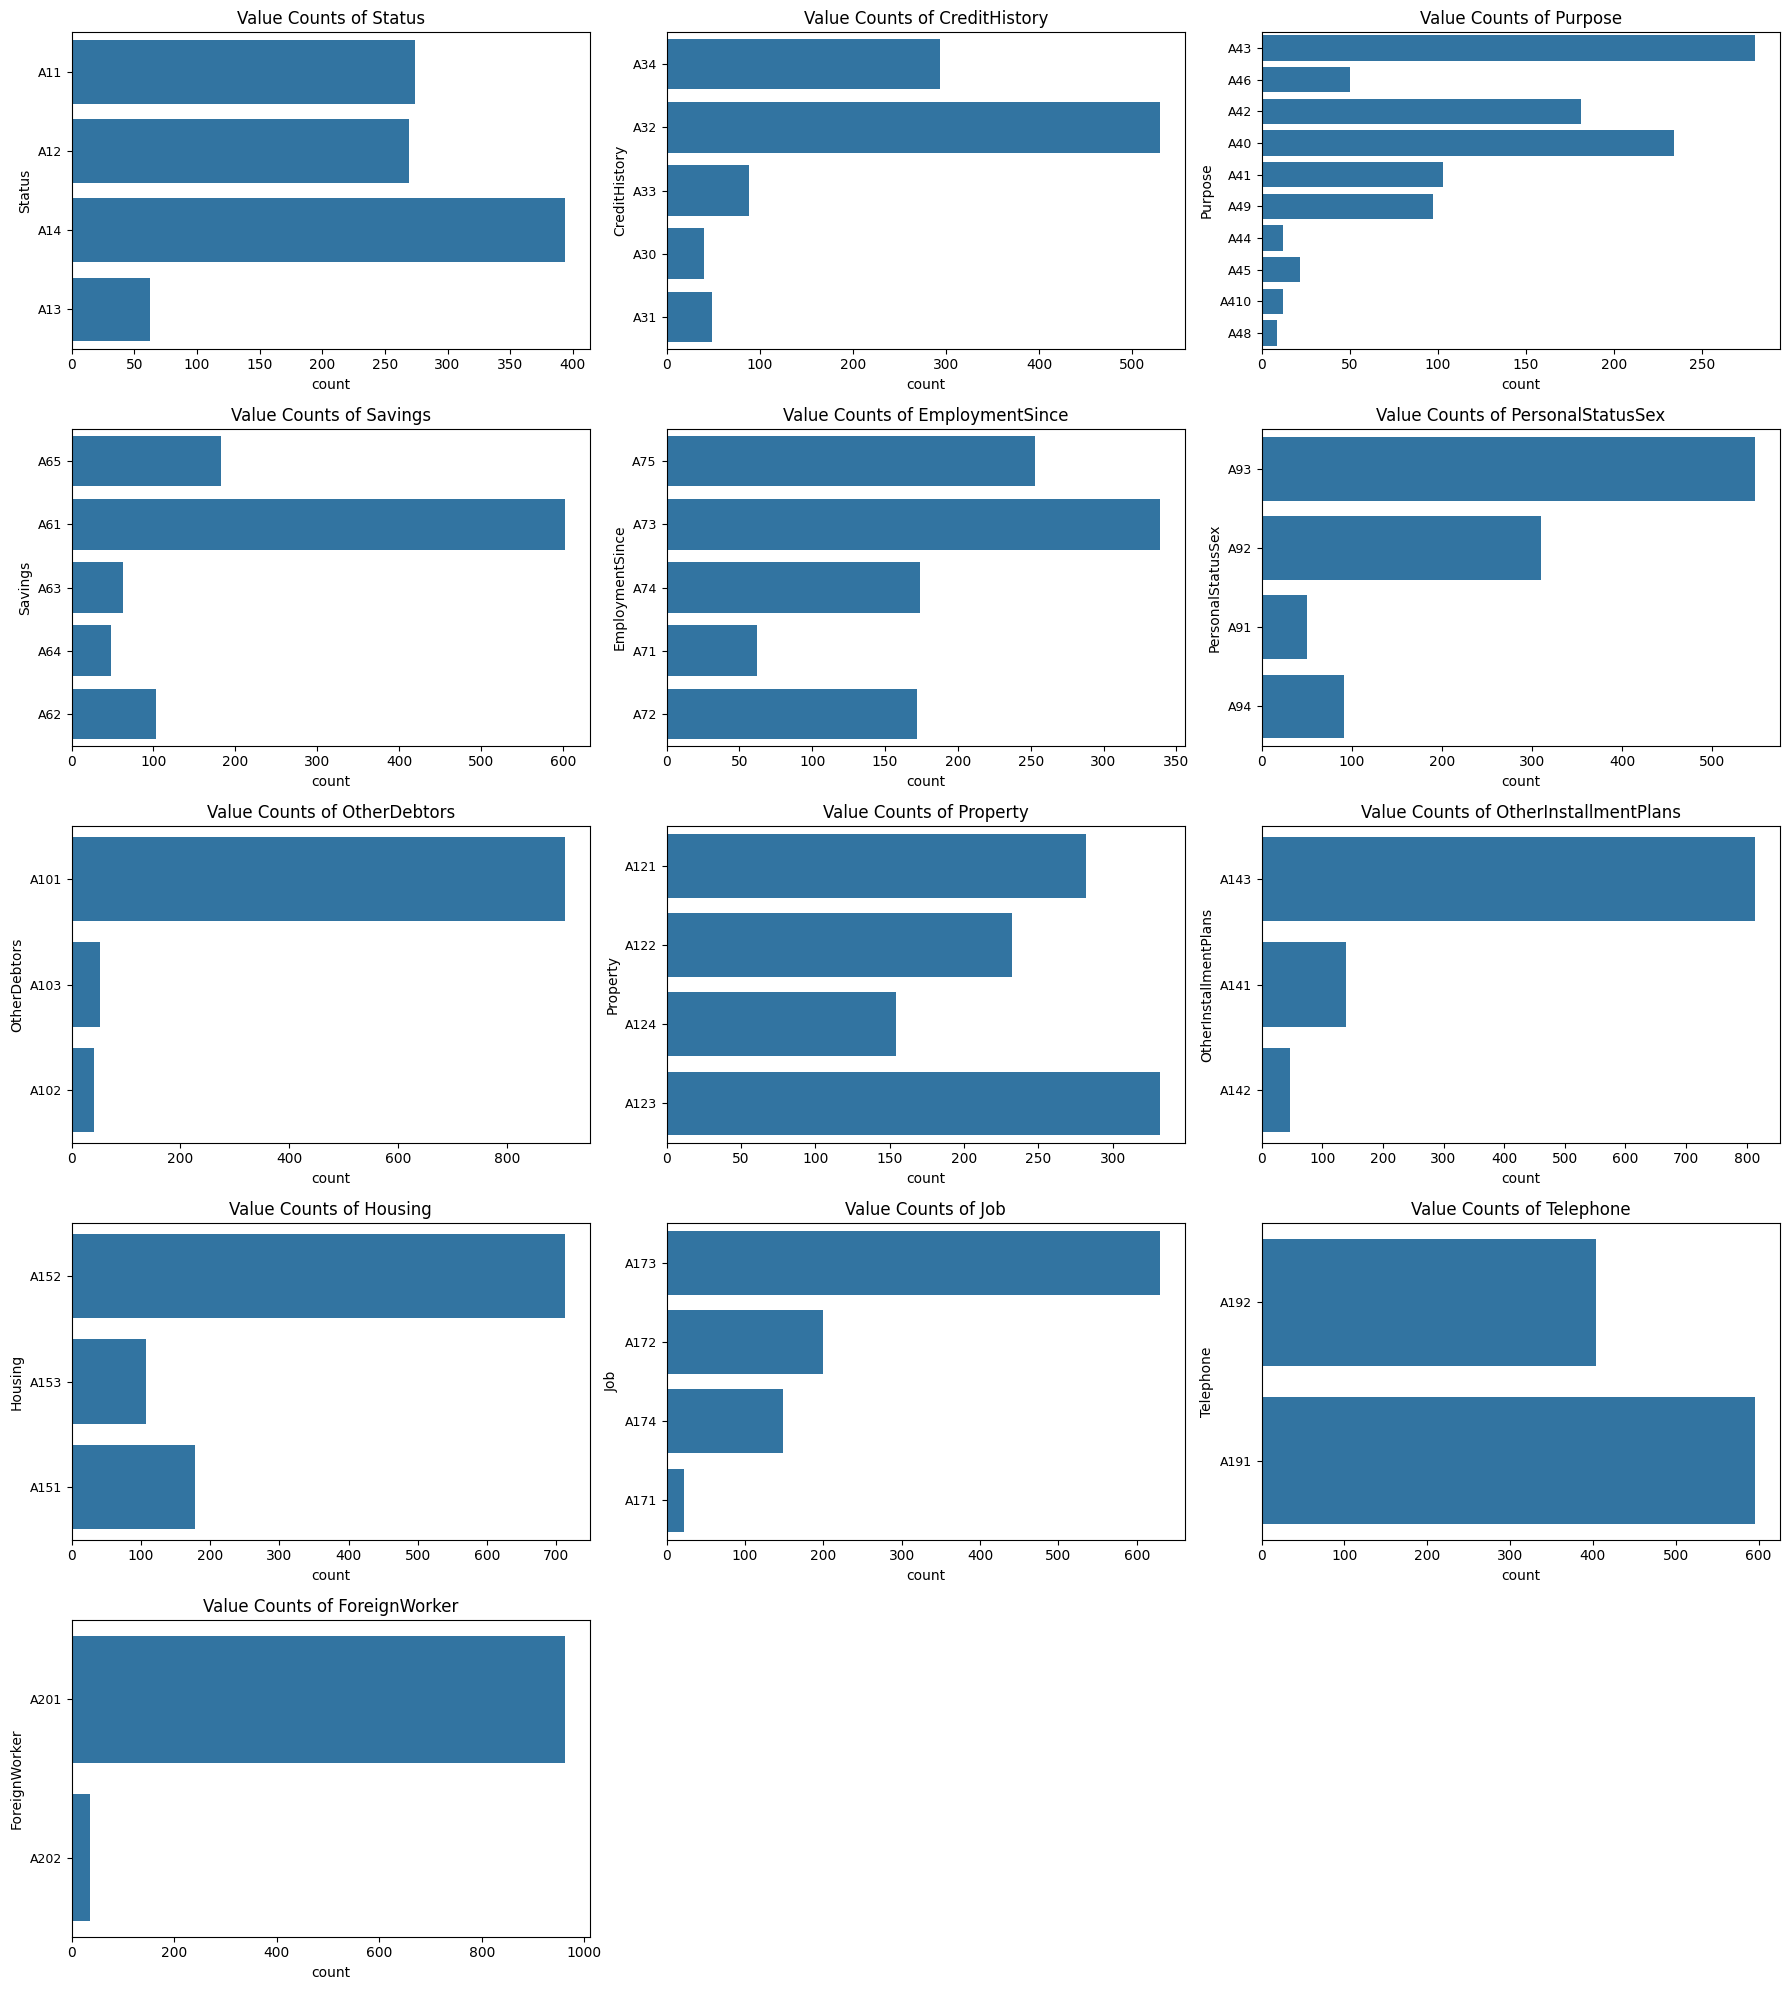

In [57]:

if len(categorical_cols) > 0:
    n_cols = 3
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Value Counts of {col}')
        axes[i].tick_params(axis='y', labelsize=9)

    for ax in axes[len(categorical_cols):]:
        ax.remove()

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the DataFrame.")

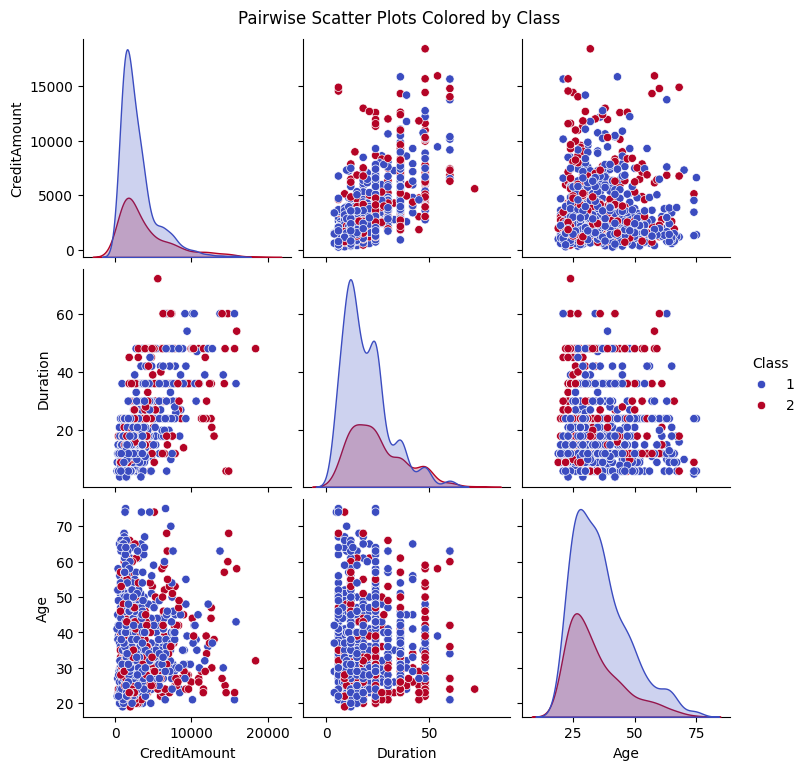

In [58]:
sns.pairplot(df, vars=["CreditAmount", "Duration", "Age"], hue="Class", palette="coolwarm")
plt.suptitle("Pairwise Scatter Plots Colored by Class", y=1.02)
plt.show()

# Working with imblance data

In [59]:
from sklearn.utils import resample

# Separate classes
df_majority = df[df['Class'] == 1]
df_minority = df[df['Class'] == 2]

# Downsample majority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,     # with replacement
                                   n_samples=len(df_majority), 
                                   random_state=42)

df_balanced = pd.concat([df_majority, df_minority_oversampled])


In [60]:
df['Class'].value_counts()

Class
1    700
2    300
Name: count, dtype: int64

In [61]:
df_balanced['Class'].value_counts()

Class
1    700
2    700
Name: count, dtype: int64

In [62]:
df_balanced.shape

(1400, 21)

# Build Machine learning models

<h2>Split the Data

In [63]:
df_train, df_test = train_test_split(df_balanced, test_size=0.2, stratify = df_balanced['Class']) # Make it balance with this target variable in both sides
X_train = df_train.copy()
y_train = X_train.pop("Class")

In [64]:
X_test = df_test.copy()
y_test = X_test.pop("Class")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1120, 20) (1120,)
(280, 20) (280,)


In [65]:
# Lấy list names của các biến phân loại và biến liên tục.
categorical_cols
numeric_cols

['Duration',
 'CreditAmount',
 'InstallmentRate',
 'ResidenceSince',
 'Age',
 'NumberCredits',
 'LiablePeople']

In [66]:
# Pipeline for numeric columns
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Handle missing data = KNN predict with n=7
           ('scaler', MinMaxScaler()) # Handle missing data = MinMax scaler
    ]
)

In [67]:
# Pipeline for categorical columns
cat_pl = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Handle missing data = most frequent 
        ('onehot', OneHotEncoder()), # categorical data ==> One hot vector
    ]
)

In [68]:
# Create column transformer to apply Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, numeric_cols), # apply pipeline for continous data
        ('cat', cat_pl, categorical_cols), # apply pipeline for discrete data (categorical data)
    ]
)

In [69]:
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", RandomForestClassifier())
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on test: 0.89


## Cross validation

In [70]:
from sklearn.metrics import fbeta_score, make_scorer

# Tính fbeta score
def fbeta(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=np.sqrt(5))

In [71]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define scoring metric
metric = make_scorer(fbeta)

# Evaluate model
scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.874 0.049


## Gridsearch

In [72]:
from sklearn.base import BaseEstimator

class ClassifierSwitcher(BaseEstimator):
    def __init__(self, estimator = RandomForestClassifier()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [73]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(
    steps=[("pre", preprocessor), ("clf", ClassifierSwitcher())]
)

parameters = [
    {
        'clf__estimator': [LogisticRegression()], 
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

In [74]:
metric = make_scorer(fbeta)
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Duration',
                                                                          'CreditAmount',
                                                                          'InstallmentRate',
                                                                          'ResidenceSince',
                                                                          'Age',
                                                                          'NumberCredits',
                                                                          'LiablePeople']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                          'clf__estimator__max_iter': [50, 80],
                          'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
                          'clf__estimator__tol': [0.0001]},
                         {'clf__estimator': [RandomForestClassifier()],
                          'clf__estimator__criterion': ('gini', 'entropy'),
                          'clf__estimator__max_depth': [5, 10],
                          'clf__estimator__n_estimators': [50, 100]}],
             return_train_score=True,
             scoring=make_scorer(fbeta, response_method='predict'), verbose=3)

In [75]:
gscv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Duration', 'CreditAmount',
                                                   'InstallmentRate',
                                                   'ResidenceSince', 'Age',
                                                   'NumberCredits',
                                                   'LiablePeople']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Status', 'CreditHistory',
                                                   'Purpose', 'Savings',
                                                   'EmploymentSince',
                                                   'PersonalStatusSex',
                                                   'OtherDebtors', 'Property',
                                                   'OtherInstallmentPlans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'ForeignWorker'])])),
                ('clf',
                 ClassifierSwitcher(estimator=RandomForestClassifier(max_depth=10)))])

In [76]:
gscv.best_params_

{'clf__estimator': RandomForestClassifier(),
 'clf__estimator__criterion': 'gini',
 'clf__estimator__max_depth': 10,
 'clf__estimator__n_estimators': 100}

In [77]:
gscv.best_score_

0.8210104989268838

In [78]:
# Example: Single row prediction
new_data = df.iloc[[0]]  # select one row from the original df
prediction = gscv.predict(new_data)
proba = gscv.predict_proba(new_data)

print("Predicted Class:", prediction[0])
print("Probability:", proba[0])

Predicted Class: 1
Probability: [0.87416794 0.12583206]


In [79]:
def try_to_predict(new_data): 
    prediction = gscv.predict(new_data)
    proba = gscv.predict_proba(new_data)
    
    print("Predicted Class:", prediction[0])
    print("Probability:", proba[0])    

In [96]:
try_to_predict(df.iloc[[76]])

Predicted Class: 2
Probability: [0.20187542 0.79812458]


In [83]:
y_pred = gscv.predict(X_test)

In [84]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.83      0.86       140
           2       0.84      0.91      0.87       140

    accuracy                           0.87       280
   macro avg       0.87      0.87      0.87       280
weighted avg       0.87      0.87      0.87       280



In [97]:
df.iloc[[76]]

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,LiablePeople,Telephone,ForeignWorker,Class
76,A11,42,A32,A43,3965,A61,A72,4,A93,A101,...,A123,34,A143,A152,1,A173,1,A191,A201,2


In [99]:
import joblib
joblib.dump(gscv.best_estimator_, 'best_credit_model2_copy.joblib')

['best_credit_model2_copy.joblib']

In [102]:
from xgboost import XGBClassifier

parameters = [
    {
        'clf__estimator': [XGBClassifier(use_label_encoder=False, eval_metric='logloss')],
        'clf__estimator__n_estimators': [100, 200],
        'clf__estimator__max_depth': [3, 5, 10],
        'clf__estimator__learning_rate': [0.01, 0.1],
        'clf__estimator__subsample': [0.8, 1.0]
    }
]
